이 고양이의 품종은 Persian 입니다.


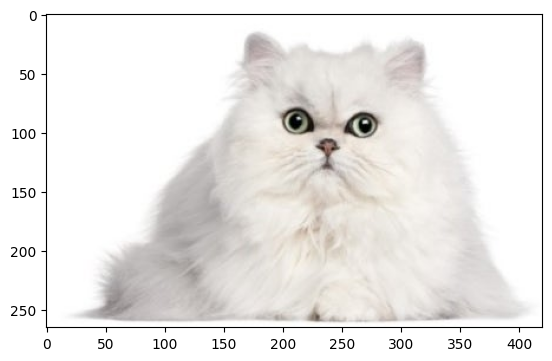

In [1]:
import torch
from torchvision import transforms, models
from PIL import Image
import matplotlib.pyplot as plt
from torch import nn

class CustomModel(nn.Module):
    def __init__(self, base_model, num_classes, dropout):
        super(CustomModel, self).__init__()
        self.base_model = base_model
        self.dropout = nn.Dropout(p=dropout)
        self.fc = nn.Linear(179200, num_classes)
       
    def forward(self, x):
        x = self.base_model.features(x)
        x = self.dropout(x)
        x = x.view(x.size(0), -1)
        x = self.fc(x)
        return x

def load_model(model_path, num_classes, dropout):
    base_model = models.efficientnet_b4(weights=None)
    model = CustomModel(base_model, num_classes, dropout)
    model.load_state_dict(torch.load(model_path, map_location=torch.device('cpu')))
    model.eval()
    return model

def predict_image(image_path, model, transform, class_names):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)

    with torch.no_grad():
        outputs = model(image)
        _, preds = torch.max(outputs, 1)

    return class_names[preds[0]]

def main(image_path, model_path, class_names):
    image_size = 320
    dropout = 0.5  # Use the same dropout value used during training

    data_transform = transforms.Compose([
        transforms.Resize((image_size, image_size)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])

    model = load_model(model_path, len(class_names), dropout)
    prediction = predict_image(image_path, model, data_transform, class_names)

    print(f"이 고양이의 품종은 {prediction} 입니다.")

    image = Image.open(image_path)
    plt.imshow(image)
    plt.show()

if __name__ == "__main__":

    image_path = "p.jpg"

    model_path = "cat_breeds_efficientnet_b4_79_2H.pth"

    class_names = ['Abyssinian', 'American Bobtail', 'American Curl', 'American Shorthair',
                   'Bengal', 'Birman', 'Bombay', 'British Shorthair',
                   'Egyptian Mau', 'Exotic Shorthair', 'Maine Coon', 'Manx',
                   'Norwegian Forest', 'Persian', 'Ragdoll', 'Russian Blue',
                   'Scottish Fold', 'Siamese', 'Sphynx', 'Turkish Angora']
    main(image_path, model_path, class_names)
